In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [6]:
eu_waste_data = pd.read_csv('../src/aggregate_trash.csv', header='infer')

In [7]:
eu_waste_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061452 entries, 0 to 1061451
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   stk_flow     1061452 non-null  object 
 1   rawmat       1061452 non-null  object 
 2   partner      1058928 non-null  object 
 3   unit         1061452 non-null  object 
 4   geo          1061452 non-null  object 
 5   TIME_PERIOD  1061452 non-null  int64  
 6   OBS_VALUE    1061452 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 56.7+ MB


In [8]:
eu_waste_data = eu_waste_data[eu_waste_data["partner"] == "KR"]

In [9]:
print (eu_waste_data.head())

    stk_flow rawmat partner unit        geo  TIME_PERIOD  OBS_VALUE
210      EXP   GLAS      KR    T         DE         2009    15059.0
211      EXP   GLAS      KR    T  EU27_2020         2009    17699.0
212      EXP   GLAS      KR    T         FR         2009     1670.0
213      EXP   GLAS      KR    T         IE         2009       53.0
214      EXP   GLAS      KR    T         IT         2009      917.0


In [10]:
max_kr_ue = eu_waste_data.loc [eu_waste_data['partner'] == 'KR' , 'OBS_VALUE'].max()

In [11]:
print(f"Maximum value of European waste with Korean Partnership: {max_kr_ue}")

Maximum value of European waste with Korean Partnership: 712487.2


In [12]:
min_kr_eu = eu_waste_data.loc [eu_waste_data['partner'] == 'KR', 'OBS_VALUE'].min()

In [13]:
print(f"Minimum value of European waste with Korean Partnership: {min_kr_eu}")

Minimum value of European waste with Korean Partnership: 0.0


In [14]:
geo_eu = eu_waste_data.head(40)['geo'].unique()

In [15]:
print(geo_eu)

['DE' 'EU27_2020' 'FR' 'IE' 'IT' 'ES' 'NL' 'AT' 'BE' 'BG' 'CY' 'CZ' 'DK'
 'EE' 'EL' 'FI' 'HU' 'LT' 'LV' 'PL']


In [16]:
geo_eu = eu_waste_data.head()['partner'].unique()
print(geo_eu)

['KR']


In [17]:
europe_df = pd.read_csv('../src/aggregate_trash.csv', header='infer')

In [18]:
europe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061452 entries, 0 to 1061451
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   stk_flow     1061452 non-null  object 
 1   rawmat       1061452 non-null  object 
 2   partner      1058928 non-null  object 
 3   unit         1061452 non-null  object 
 4   geo          1061452 non-null  object 
 5   TIME_PERIOD  1061452 non-null  int64  
 6   OBS_VALUE    1061452 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 56.7+ MB


In [19]:
europe_partner = europe_df.head(16330)['partner'].unique()#
print(europe_partner)

['AE' 'AR' 'BA' 'BR' 'BY' 'CA' 'CH' 'CL' 'CN' 'EL' 'EXT_EU27_2020' 'FO'
 'GE' 'GL' 'HK' 'ID' 'IL' 'IN' 'INT_EU27_2020' 'IR' 'JP' 'KR' 'LB' 'LI'
 'MD' 'MV' 'MY' 'NO' 'NZ' 'PE' 'RU' 'SA' 'TG' 'TH' 'TN' 'TR' 'TW' 'UA'
 'UK' 'US' 'VN' 'ZA' 'AD' 'AL' 'AN' 'AO' 'AU' 'AW' 'AZ' 'BN' 'CD' 'CG'
 'CM' 'CO' 'CU' 'CV' 'DZ' 'EG' 'ET' 'GA' 'GH' 'GI' 'GQ' 'IS' 'JO' 'KW'
 'KZ' 'LY' 'MA' 'MG' 'MK' 'MU' 'MX' 'MZ' 'NC' 'NG' 'PA' 'PH' 'PK' 'RS'
 'SG' 'SN' 'SR' 'ST' 'SY' 'TT' 'VE' 'AF' 'AG' 'AM' 'BB' 'BD' 'BF' 'BH'
 'BI' 'BJ' 'BM' 'BO' 'BW' 'CI' 'CK' 'CR' 'DJ' 'DO' 'EC' 'GM' 'GN' 'GT'
 'GW' 'IQ' 'JM' 'KE' 'KP' 'LK' 'LR' 'ME' 'ML' 'MO' 'MR' nan 'NP' 'OM' 'PF'
 'PW' 'PY' 'QA' 'RW' 'SM' 'TC' 'TJ' 'TM' 'UY' 'VC' 'VG' 'VI' 'WF' 'XK'
 'YE' 'YT' 'ZW' 'BS' 'MM' 'NE' 'SC' 'SD' 'SV' 'TZ' 'UG' 'HN' 'KG' 'TD'
 'UZ' 'SL' 'BZ' 'CF' 'DM' 'ER' 'GD' 'GU' 'GY' 'HT' 'KH' 'KM' 'LA' 'LC'
 'MW' 'NF' 'NI' 'ZM']


In [20]:
kr_df_med = pd.read_csv('../src/KR_Medical_Waste.csv', header='infer')

In [21]:
kr_df_med.head(12)

,업체명,2017,2021,2022
0,(주)경서,1799.74,6363.40,4831.20
1,(주)디디에스,4092.69,10695.88,5459.09
2,(주)스테리싸이클코리아,34969.74,34929.56,16071.19
3,(주)아림환경,22463.80,17521.35,8941.49
4,(주)에코비트에너지경주,40417.03,30903.76,16013.73
5,(주)에코비트에너지광주,9801.84,8730.44,4772.30
6,(주)엔비텍코리아,6951.85,6039.99,3271.27
7,(주)이메디원,7705.06,18611.26,8712.33
8,도시환경(주),21655.49,17556.64,6224.84
9,엔씨메디(주),3248.72,3577.44,1823.79


In [22]:
kr_df_med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   업체명     13 non-null     object 
 1   2017    13 non-null     float64
 2   2021    13 non-null     float64
 3   2022    13 non-null     float64
dtypes: float64(3), object(1)
memory usage: 548.0+ bytes


In [23]:
max_companies = kr_df_med.loc[kr_df_med[['2017', '2021', '2022']].idxmax(), ['업체명']]

In [24]:
print(max_companies)

            업체명
4  (주)에코비트에너지경주
2  (주)스테리싸이클코리아
2  (주)스테리싸이클코리아


In [45]:
years = ['2017', '2021', '2022']


max_values = kr_df_med[years].max().values  
max_companies = kr_df_med.loc[kr_df_med[years].idxmax(), '업체명'].values  

outcome = pd.DataFrame({'Year': years, 'Company': max_companies, 'Max': max_values})

print(outcome)


   Year       Company       Max
0  2017  (주)에코비트에너지경주  40417.03
1  2021  (주)스테리싸이클코리아  34929.56
2  2022  (주)스테리싸이클코리아  16071.19


In [ ]:
kr_df_med['Highest Year'] = kr_df_med[years].idxmax(axis=1)
print(kr_df_med[['업체명', 'Highest Year']])

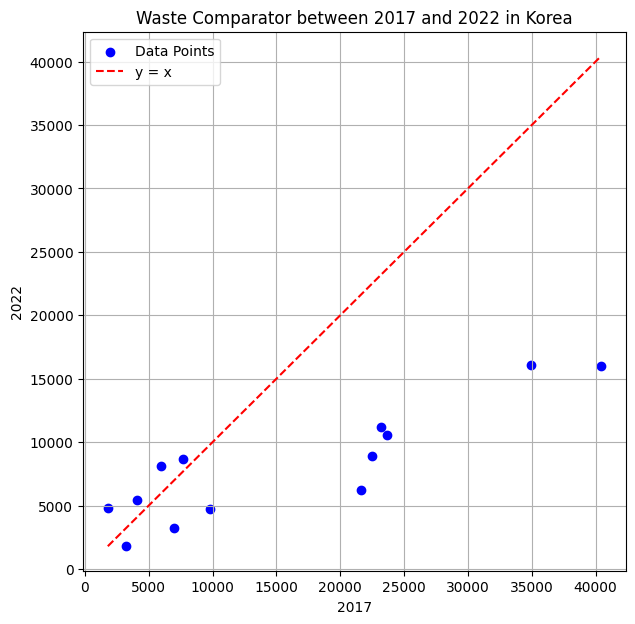

In [52]:
x = kr_df_med['2017']  # Feature
y = kr_df_med['2022']  # Target

plt.figure(figsize=(7, 7))
plt.scatter(x, y, color='blue', label="Data Points")

min_val = min(x.min(), y.min())  
max_val = max(x.max(), y.max())  
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label="y = x")

plt.xlabel("2017")
plt.ylabel("2022")
plt.title("Waste Comparator between 2017 and 2022 in Korea")
plt.legend()
plt.grid(True)
plt.show()

In [25]:
min_companies = kr_df_med.loc[kr_df_med[['2017', '2021', '2022']].idxmin(), ['업체명']]

In [26]:
print(min_companies)

       업체명
0    (주)경서
9  엔씨메디(주)
9  엔씨메디(주)


In [27]:
kr_df_med.describe()

,2017,2021,2022
count,13.000000,13.000000,13.000000
mean,15841.276923,16298.576154,8155.468462
std,12698.932387,9524.388384,4451.375375
min,1799.740000,3577.440000,1823.790000
25%,5986.010000,8730.440000,4831.200000
50%,9801.840000,17521.350000,8153.730000
75%,23205.360000,19449.650000,10535.810000
max,40417.030000,34929.560000,16071.190000


In [28]:
print(kr_df_med.shape)

(13, 4)


In [29]:
kr_df_gen = pd.read_csv('../src/KR_Corp_Waste.csv', encoding="cp949")

In [30]:
kr_df_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16330 entries, 0 to 16329
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기초시군구(관할관청)  16330 non-null  object 
 1   업체명          16330 non-null  object 
 2   연락처          15850 non-null  object 
 3   폐기물구분        9691 non-null   object 
 4   폐기물명         16330 non-null  object 
 5   연간배출량(톤)     16330 non-null  float64
dtypes: float64(1), object(5)
memory usage: 765.6+ KB


In [31]:
kr_df_gen.head(5)

,기초시군구(관할관청),업체명,연락처,폐기물구분,폐기물명,연간배출량(톤)
0,강원특별자치도 강릉시,(주)기성환경,033-655-6969,사업장배출시설계폐기물,그 밖의 폐목재류,250.83
1,강원특별자치도 강릉시,(주)기성환경,033-655-6969,사업장배출시설계폐기물,폐합성수지류(폐염화비닐수지류는 제외한다),219.17
2,강원특별자치도 강릉시,(주)에코비트워터(강릉하수처리장),033-650-5200,사업장배출시설계폐기물,그 밖의 공정오니(무기성),0.00
3,강원특별자치도 강릉시,(주)에코비트워터(강릉하수처리장),033-650-5200,사업장배출시설계폐기물,그 밖의 유기성오니,0.00
4,강원특별자치도 강릉시,(주)에코비트워터(강릉하수처리장),033-650-5200,사업장배출시설계폐기물,그 밖의 폐기물,0.00


In [32]:
print(kr_df_gen.shape)

(16330, 6)


In [33]:
eu_df = pd.read_csv('../src/aggregate_trash.csv', header='infer')

In [34]:
eu_df.head(18)

,stk_flow,rawmat,partner,unit,geo,TIME_PERIOD,OBS_VALUE
0,EXP,GLAS,AE,T,DE,2009,5.0
1,EXP,GLAS,AE,T,EU27_2020,2009,5.0
2,EXP,GLAS,AE,THS_EUR,DE,2009,5.7
3,EXP,GLAS,AE,THS_EUR,EU27_2020,2009,5.7
4,EXP,GLAS,AR,T,BE,2009,0.0
5,EXP,GLAS,AR,T,EU27_2020,2009,0.0
6,EXP,GLAS,AR,THS_EUR,BE,2009,0.1
7,EXP,GLAS,AR,THS_EUR,EU27_2020,2009,0.1
8,EXP,GLAS,BA,T,EU27_2020,2009,0.0
9,EXP,GLAS,BA,T,SI,2009,0.0


In [35]:
eu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061452 entries, 0 to 1061451
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   stk_flow     1061452 non-null  object 
 1   rawmat       1061452 non-null  object 
 2   partner      1058928 non-null  object 
 3   unit         1061452 non-null  object 
 4   geo          1061452 non-null  object 
 5   TIME_PERIOD  1061452 non-null  int64  
 6   OBS_VALUE    1061452 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 56.7+ MB


In [36]:
max_eu = eu_df.loc[eu_df[['geo']].idxmin(), ['OBS_VALUE']]

In [37]:
print(max_eu)

    OBS_VALUE
32     1097.0
